In [4]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 45.9 MB/s eta 0:00:00


In [2]:
!pip install wordcloud

     ------------------------------------ 300.2/300.2 kB 314.5 kB/s eta 0:00:00


In [3]:
!pip show konlpy
!pip show wordcloud

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: c:\users\bluecom014\miniconda3\envs\mp\lib\site-packages
Requires: JPype1, lxml, numpy
Required-by: 
Name: wordcloud
Version: 1.9.3
Summary: A little word cloud generator
Home-page: 
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: c:\users\bluecom014\miniconda3\envs\mp\lib\site-packages
Requires: matplotlib, numpy, pillow
Required-by: 


In [5]:
!pip install pandas

     ---------------------------------------- 10.0/10.0 MB 7.4 MB/s eta 0:00:00
     ------------------------------------- 505.5/505.5 kB 16.0 MB/s eta 0:00:00


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
from wordcloud import WordCloud

In [9]:
df=pd.read_table('ratings_train.txt')
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [10]:
df[df['label']==0]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
...,...,...,...
149990,6373651,이걸 영화라고 찎었냐?,0
149992,9335962,공포나 재난영화가 아니라 아예 대놓고 비급 크리쳐개그물임ㅋㅋ 음악 완전 흥겹다ㅋ 5...,0
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0


In [11]:
df[df['label']==1]

,id,document,label
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1
10,9008700,걍인피니트가짱이다.진짜짱이다♥,1
...,...,...,...
149991,9492905,http://blog.naver.com/oroblast/220215679580 나쁜...,1
149993,10020916,For Carl.칼 세이건으로 시작해서 칼 세이건으로 끝난다.,1
149994,9458520,디케이드 다음에 더블 다음에 오즈인데 더블은 조금밖에 안나오네요.,1
149996,8549745,평점이 너무 낮아서...,1


In [15]:
# 데이터 편향 (label, 긍부정 개수)
tmp = df['label'].value_counts()

<BarContainer object of 2 artists>

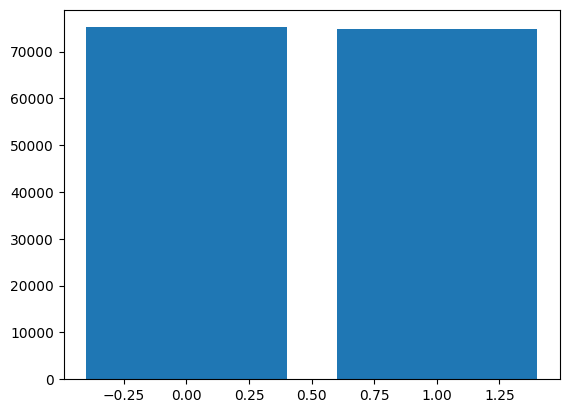

In [16]:
plt.bar(tmp.index, tmp)

In [12]:
print(df['id'].nunique())  # nunique은 유니크한 개수 (중복되지 않은)
print(df.isnull().sum())

150000
id          0
document    5
label       0
dtype: int64


In [21]:
## 비어있는 document 리스트 확인
df[df['document'].isnull()==True]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [22]:
df = df.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(df.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [23]:
df['document'] = df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

c:\Users\bluecom014\miniconda3\envs\mp\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
c:\Users\bluecom014\miniconda3\envs\mp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [28]:
from konlpy.tag import Okt
okt=Okt()
sentence = df['document'][1]
okt.pos(sentence)

[('흠', 'Noun'),
 ('포스터', 'Noun'),
 ('보고', 'Noun'),
 ('초딩', 'Noun'),
 ('영화', 'Noun'),
 ('줄', 'Noun'),
 ('오버', 'Noun'),
 ('연기', 'Noun'),
 ('조차', 'Josa'),
 ('가볍지', 'Adjective'),
 ('않구나', 'Verb')]

In [32]:
temp_list=[]
dataList = []

for sentence in df['document'][:10000]:
 s_list=okt.pos(sentence)
 dataList.append(s_list)
 for word,tag in s_list:
   if tag in ['Noun','Adjective']:
     temp_list.append(word)
counts=collections.Counter(temp_list)
tag=counts.most_common(50)
tag

[('영화', 3359),
 ('정말', 656),
 ('진짜', 547),
 ('점', 513),
 ('이', 500),
 ('연기', 435),
 ('평점', 423),
 ('최고', 419),
 ('것', 412),
 ('스토리', 358),
 ('사람', 344),
 ('드라마', 339),
 ('왜', 335),
 ('보고', 331),
 ('감동', 319),
 ('생각', 319),
 ('감독', 306),
 ('때', 304),
 ('말', 302),
 ('시간', 287),
 ('배우', 278),
 ('더', 274),
 ('그냥', 273),
 ('거', 271),
 ('재미', 266),
 ('내용', 264),
 ('내', 259),
 ('이런', 253),
 ('그', 238),
 ('뭐', 237),
 ('없는', 235),
 ('좀', 230),
 ('쓰레기', 227),
 ('작품', 227),
 ('하나', 205),
 ('나', 200),
 ('수', 199),
 ('없다', 197),
 ('사랑', 196),
 ('이건', 190),
 ('볼', 187),
 ('같은', 185),
 ('정도', 182),
 ('있는', 179),
 ('다시', 179),
 ('마지막', 177),
 ('액션', 176),
 ('주인공', 167),
 ('걸', 164),
 ('연출', 163)]

In [33]:
dataList

[[('아', 'Exclamation'),
  ('더빙', 'Noun'),
  ('진짜', 'Noun'),
  ('짜증나네요', 'Adjective'),
  ('목소리', 'Noun')],
 [('흠', 'Noun'),
  ('포스터', 'Noun'),
  ('보고', 'Noun'),
  ('초딩', 'Noun'),
  ('영화', 'Noun'),
  ('줄', 'Noun'),
  ('오버', 'Noun'),
  ('연기', 'Noun'),
  ('조차', 'Josa'),
  ('가볍지', 'Adjective'),
  ('않구나', 'Verb')],
 [('너', 'Modifier'),
  ('무재', 'Noun'),
  ('밓었', 'Noun'),
  ('다그', 'Noun'),
  ('래서', 'Noun'),
  ('보는것을', 'Verb'),
  ('추천', 'Noun'),
  ('한', 'Josa'),
  ('다', 'Adverb')],
 [('교도소', 'Noun'),
  ('이야기', 'Noun'),
  ('구먼', 'Noun'),
  ('솔직히', 'Adjective'),
  ('재미', 'Noun'),
  ('는', 'Josa'),
  ('없다', 'Adjective'),
  ('평점', 'Noun'),
  ('조정', 'Noun')],
 [('사이', 'Modifier'),
  ('몬페', 'Noun'),
  ('그', 'Determiner'),
  ('의', 'Noun'),
  ('익살스런', 'Adjective'),
  ('연기', 'Noun'),
  ('가', 'Josa'),
  ('돋보였던', 'Verb'),
  ('영화', 'Noun'),
  ('스파이더맨', 'Noun'),
  ('에서', 'Josa'),
  ('늙어', 'Verb'),
  ('보이기만', 'Verb'),
  ('했던', 'Verb'),
  ('커스틴', 'Noun'),
  ('던스트', 'Noun'),
  ('가', 'Josa'),
  ('너무나도', 'Adverb

In [38]:
tmp = df[:10000].copy()
tmp['pos']=dataList
tmp.to_csv('pos_result.csv', index=False, encoding='cp949')
tmp.head()

,id,document,label,pos
0,9976970,아 더빙 진짜 짜증나네요 목소리,0,"[(아, Exclamation), (더빙, Noun), (진짜, Noun), (짜증..."
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1,"[(흠, Noun), (포스터, Noun), (보고, Noun), (초딩, Noun..."
2,10265843,너무재밓었다그래서보는것을추천한다,0,"[(너, Modifier), (무재, Noun), (밓었, Noun), (다그, N..."
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0,"[(교도소, Noun), (이야기, Noun), (구먼, Noun), (솔직히, A..."
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1,"[(사이, Modifier), (몬페, Noun), (그, Determiner), ..."


In [39]:
긍정 = df[df['label']==1][:1000]
부정 = df[df['label']==0][:1000]

In [46]:
from wordcloud import WordCloud

font_path = r'C:\Users\bluecom014\miniconda3\envs\sesac\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\NanumBarunGothic.ttf'
wc=WordCloud(font_path=font_path,background_color='skyblue', max_font_size=60)
cloud=wc.generate_from_frequencies(dict(tag))
cloud

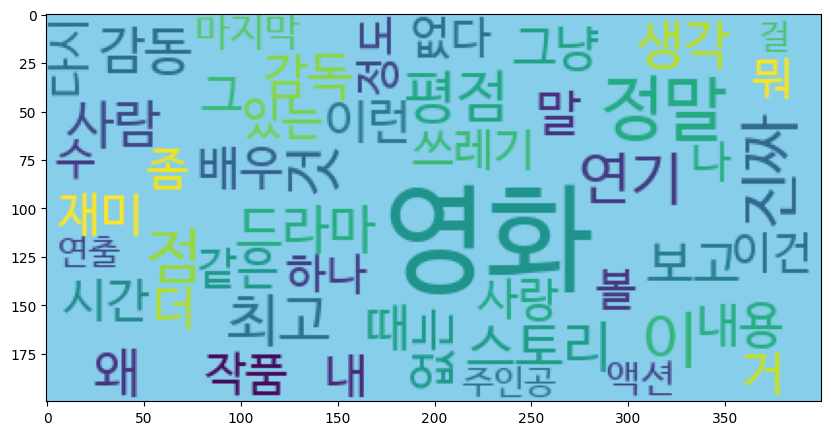

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(cloud)

In [40]:
from konlpy.tag import Okt

def doc2tag(x, top=50):
    okt=Okt()
    temp_list = []
    for sentence in x:
        s_list = okt.pos(sentence)
        for word,tag in s_list:
            if tag in ['Noun','Adjective']:
                temp_list.append(word)
        counts=collections.Counter(temp_list)
        tag=counts.most_common(top)
    return tag

doc2tag(긍정['document'])[:5]

[('영화', 365), ('정말', 96), ('최고', 80), ('이', 67), ('연기', 51)]

In [44]:
result = doc2tag(긍정['document'])[:5]

In [50]:
dict(result).keys()

dict_keys(['영화', '정말', '최고', '이', '연기'])

In [48]:
label, cnt = zip(*result)
label

('영화', '정말', '최고', '이', '연기')

<BarContainer object of 5 artists>

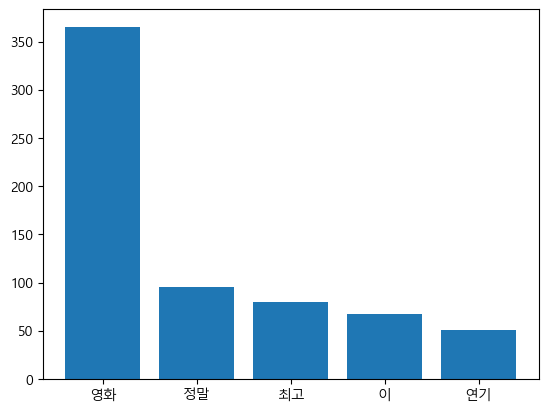

In [52]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.bar(dict(result).keys(), dict(result).values())

In [65]:
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
df = pd.read_table('ratings_train.txt')[:1000]
df

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
995,10275296,미달이는.. 연예계를 바라보는 태도를 고쳐야 한다.,0
996,6473973,파괴된 관객들.,0
997,8417568,알콜중독자들 덕에 평점이 낮은가?,1
998,7126211,중견배우들이 만들어놓은 긴장감이 나름 긴장감있게 싸워보려했던 도술사들에 의해 헛웃음...,0


In [79]:
def word_count_function(df, word):
    word_list = [word for sentence in df['document'] for word, tag in okt.pos(sentence) if tag in 'Noun']
    print(Counter(word_list)[word])
    print(Counter(word_list)[word] / sum(Counter(word_list).values()))

In [80]:
## 전체 데이터에서 감독, 배우 빈도수, 확률
word_count_function(df, '감독')
word_count_function(df, '배우')

27
0.0036388140161725067
30
0.004043126684636119


In [81]:
## label 값이 0인 (부정리뷰)에서 감독, 배우 빈도수, 확률

word_count_function(df[df['label']==0], '감독')
word_count_function(df[df['label']==0], '배우')

17
0.004487856388595565
17
0.004487856388595565


In [82]:
## label 값이 1인 (긍정리뷰)에서 감독, 배우 빈도수, 확률

word_count_function(df[df['label']==1], '감독')
word_count_function(df[df['label']==1], '배우')

10
0.0027533039647577094
13
0.003579295154185022


In [88]:
word_list = [word for sentence in df['document'] for word, tag in okt.pos(sentence) if tag in 'Noun']
print(Counter(word_list).keys())
print(Counter(word_list).values())
df_word_count = pd.DataFrame({'word':Counter(word_list).keys(), 'count':Counter(word_list).values()})

dict_keys(['더빙', '진짜', '목소리', '흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '무재', '밓었', '다그', '래서', '추천', '교도소', '이야기', '구먼', '재미', '평점', '조정', '몬페', '의', '스파이더맨', '커스틴', '던스트', '막', '걸음', '마', '세', '초등학교', '학년', '생인', '반개', '움', '원작', '긴장감', '제대로', '별', '욕', '이응경', '길용우', '생활', '년', '정말', '발', '해도', '그것', '납치', '감금', '반복', '드라마', '가족', '사람', '네', '액션', '몇', '왜케', '꽤', '볼', '데', '헐리우드', '인피니트', '짱', '볼때', '향수', '자극', '허진호', '감성', '절제', '멜로', '달인', '울면', '손', '횡단보도', '때', '뻔', '이범수', '로만', '자꾸', '그', '것', '취향', '존중', '다지', '내생', '극장', '가장', '노잼', '노', '감동', '임', '스토리', '어거지', '냥', '매번', '긴장', '재밋음', '바스코', '이기', '락스', '코', '바비', '아이돌', '그냥', '안달', '굿바이', '레닌', '표절', '이해', '왜', '뒤', '갈수록', '이건', '깨알', '캐스팅', '질퍽', '용구성', '버무러진', '일드', '약탈', '위', '변명', '놈', '절대', '걸', '나름', '뜻', '듯', '학생', '선생', '건', '음식', '도', '바베트', '만찬', '별로', '핀란드', '풍경', '할랫', '수작', '는걸', '주제', '중반', '짤랐을꺼', '납득', '수', '꼭', '고추', '카밀라', '벨', '발연기', '재밋는뎅', '센스', '연출', '점', '엄포스', '위력', '다시', '한번', '적', '남', '꽃', '검사

In [90]:
df_word_count['percentage'] = df_word_count['count']/sum(Counter(word_list).values())

In [93]:
df_word_count.sort_values('count', ascending=False)

,word,count,percentage
7,영화,340,0.055729
1,진짜,69,0.011310
45,정말,67,0.010982
156,점,54,0.008851
173,이,53,0.008687
...,...,...,...
1121,안대,1,0.000164
1120,쌍,1,0.000164
1119,란슬롯,1,0.000164
1118,흉내,1,0.000164


In [ ]:
temp_list=[]
stopword=['점','정말','왜','말','그','없다','정도','걸','뭐','이건','영화','완전','좀','있는','거','나','이','볼','입니다','것','이런','더','수','때']
for sentence in df['document']:
 s_list=okt.pos(sentence)
 for word,tag in s_list:
   if word not in stopword:
    if tag in ['Noun','Adjective']:
      temp_list.append(word)
counts=collections.Counter(temp_list)
tag=counts.most_common(50)
tag

[('진짜', 8338),
 ('연기', 6328),
 ('평점', 6315),
 ('최고', 6040),
 ('스토리', 5335),
 ('생각', 5315),
 ('드라마', 5063),
 ('감동', 4881),
 ('사람', 4837),
 ('보고', 4665),
 ('배우', 4291),
 ('내', 4133),
 ('감독', 4118),
 ('재미', 3921),
 ('시간', 3888),
 ('내용', 3814),
 ('그냥', 3758),
 ('쓰레기', 3564),
 ('없는', 3486),
 ('작품', 2980),
 ('사랑', 2943),
 ('하나', 2818),
 ('다시', 2816),
 ('마지막', 2757),
 ('좋은', 2663),
 ('같은', 2554),
 ('처음', 2453),
 ('장면', 2425),
 ('액션', 2397),
 ('주인공', 2376),
 ('최악', 2275),
 ('돈', 2196),
 ('이야기', 2174),
 ('지금', 2173),
 ('별로', 2132),
 ('느낌', 2093),
 ('임', 2090),
 ('연출', 2076),
 ('없고', 2059),
 ('명작', 2041),
 ('듯', 2040),
 ('끝', 2039),
 ('역시', 1994),
 ('년', 1991),
 ('개', 1944),
 ('재밌게', 1913),
 ('이해', 1898),
 ('안', 1843),
 ('이영화', 1816),
 ('또', 1781)]

In [53]:
! apt-get install fonts-nanum
font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


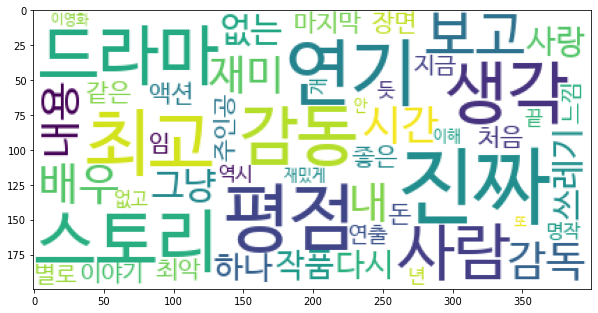

In [ ]:
# ! apt-get install fonts-nanum
# font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc=WordCloud(font_path=font_path,background_color='white', max_font_size=60)
cloud=wc.generate_from_frequencies(dict(tag))

plt.figure(figsize=(10,8))
plt.imshow(cloud)

실습12-2

In [7]:
from konlpy.tag import Okt
import collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
dict_df=pd.read_csv('/content/comment_rank.csv')


In [8]:
dict_df.head()

,Unnamed: 0,movie,comment,rank
0,0,언포기버블,영화의 단조로운 스토리를 긴장감있,10
1,1,인질,납치범 대가리가 영화 다조지네;; 집중이안되네..,6
2,2,롱 리브 더 킹: 목포 영웅,NaN,10
3,3,싱크홀,싱크홀 별로라는 말이 많던데 그래도 제가 좋아하는 장르에 배우분들도 좋아하는 분들이...,10
4,4,아수라,찢었다...모든게 찢었다.,10


In [9]:
dict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  990 non-null    int64 
 1   movie       990 non-null    object
 2   comment     891 non-null    object
 3   rank        990 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 31.1+ KB


In [10]:
dict_df['movie'].unique()

array(['언포기버블', '인질', '롱 리브 더 킹: 목포 영웅', '싱크홀', '아수라', '고양이 집사', '비바리움',
       '어메이징 스파이더맨', '미드소마', '서복', '매트릭스'], dtype=object)

In [ ]:
#dict_df.to_csv("comment_rank.csv")

In [11]:
dict_df.groupby('movie')['rank'].mean()

movie
고양이 집사              8.678947
롱 리브 더 킹: 목포 영웅    10.000000
매트릭스               10.000000
미드소마                9.285714
비바리움                9.095238
서복                  9.319149
싱크홀                 9.838384
아수라                 9.616162
어메이징 스파이더맨          9.711538
언포기버블               7.535354
인질                  9.534884
Name: rank, dtype: float64

In [12]:
temp=dict_df.groupby('movie')['comment'].count()

In [13]:
temp

movie
고양이 집사             190
롱 리브 더 킹: 목포 영웅      0
매트릭스                 8
미드소마                84
비바리움                84
서복                  47
싱크홀                 99
아수라                 99
어메이징 스파이더맨          52
언포기버블               99
인질                 129
Name: comment, dtype: int64

In [14]:
cat_df=dict_df[dict_df.movie=='고양이 집사']


In [15]:
cat_df

,Unnamed: 0,movie,comment,rank
5,5,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,10
6,6,고양이 집사,너무 사랑스런 고양이와 따뜻한 사람들의 이야기를 보며 감동 만,8
15,15,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,10
16,16,고양이 집사,너무 사랑스런 고양이와 따뜻한 사람들의 이야기를 보며 감동 만,8
25,25,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,10
...,...,...,...,...
949,949,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,9
959,959,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,9
969,969,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,9
979,979,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,9


In [ ]:
!pip install konlpy

!pip install wordcloud

     |████████████████████████████████| 127 kB 30.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.7
    Uninstalling urllib3-1.26.7:
      Successfully uninstalled urllib3-1.26.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.1.0 requires urllib3[secure]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [18]:
temp_list=[]
for sentence in cat_df['comment']:
 s_list=okt.pos(sentence)
 for word,tag in s_list:
   if tag in ['Noun','Adjective']:
     temp_list.append(word)
counts=collections.Counter(temp_list)
tag=counts.most_common(50)
tag

[('아이', 198),
 ('감동', 190),
 ('사람', 190),
 ('방금', 99),
 ('깊게', 99),
 ('우리나라', 99),
 ('독일', 99),
 ('동물보호법', 99),
 ('강화', 99),
 ('더', 99),
 ('이상', 99),
 ('없기를', 99),
 ('길위', 99),
 ('모두', 99),
 ('손길', 99),
 ('행복하기를', 99),
 ('영화', 99),
 ('세상', 99),
 ('듯', 99),
 ('좋', 99),
 ('은', 99),
 ('계시다면', 99),
 ('얼마나', 99),
 ('좋을까요', 99),
 ('출연', 99),
 ('냥', 99),
 ('모든', 99),
 ('복', 99),
 ('행복하세요', 99),
 ('덕분', 99),
 ('마음', 99),
 ('사랑스런', 91),
 ('고양이', 91),
 ('따뜻한', 91),
 ('이야기', 91),
 ('만', 91)]

In [19]:
tag_dic={}

for k,v in tag:
  tag_dic[k]=v

In [20]:
tag_dic

{'아이': 198,
 '감동': 190,
 '사람': 190,
 '방금': 99,
 '깊게': 99,
 '우리나라': 99,
 '독일': 99,
 '동물보호법': 99,
 '강화': 99,
 '더': 99,
 '이상': 99,
 '없기를': 99,
 '길위': 99,
 '모두': 99,
 '손길': 99,
 '행복하기를': 99,
 '영화': 99,
 '세상': 99,
 '듯': 99,
 '좋': 99,
 '은': 99,
 '계시다면': 99,
 '얼마나': 99,
 '좋을까요': 99,
 '출연': 99,
 '냥': 99,
 '모든': 99,
 '복': 99,
 '행복하세요': 99,
 '덕분': 99,
 '마음': 99,
 '사랑스런': 91,
 '고양이': 91,
 '따뜻한': 91,
 '이야기': 91,
 '만': 91}

In [21]:
! apt-get install fonts-nanum
font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,166 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 128208 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [22]:

!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [23]:

wc = WordCloud(font_path=font_path, background_color='white',max_font_size=60)

cloud=wc.generate_from_frequencies(tag_dic)

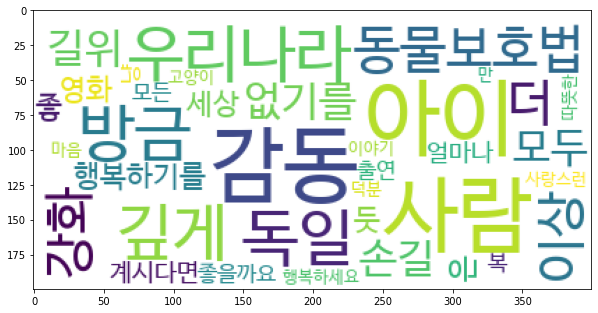

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(cloud)